In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [8]:
from datetime import datetime, timedelta

df = pd.read_csv('data/front_frame/right_turn1_ff.csv', header=None)
df.columns = ['timeStamp','xa','ya','za','xg','yg','zg', 'xc','yc','zc', 'empty','mSensorTimeStamp','mLocationLat','mLocationLong','mAcc_0','mAcc_1','mAcc_2', 'mGyr_0','mGyr_1','mGyr_2','mCom_0','mCom_1','mCom_2','mLocationSpeed','roadTypeInt','roadQualityInt']
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms') + timedelta(hours=2) # Convert the timeStamp column to Python datetime objects

# Calculate the total elapsed time in seconds
total_time = (df['timeStamp'].iloc[-1] - df['timeStamp'].iloc[0]).total_seconds()
print("Total elapsed time: {:.2f} seconds".format(total_time))

# Sampling frequency
fs = len(df)/total_time #should be 100 Hz?
print(f'Sample frequency = {fs}')

# Fixing time and time interval of interest
start_time = df['timeStamp'].iloc[0]
df['Time (s)'] = (df['timeStamp'] - start_time).dt.total_seconds()
print(df)

time = df['Time (s)']
time_interval = (time > 0) & (time < 100) #Default
#time_interval = (time > 25) & (time < 35) # Right turn 1
#time_interval = (time > 12.5) & (time < 27.5) # Left turn 1

#TODO: Find time interval where turn occurs -> look at angle
df = df[time_interval]
time = time[time_interval]

#TODO: how to approach stationary measurement? to remove offsets, since it's not really the same as DC offset removal (by using mean)

Total elapsed time: 42.21 seconds
Sample frequency = 99.18980384724722
                   timeStamp        xa        ya        za        xg       yg  \
0    2023-05-02 15:18:14.984 -1.080078 -0.191406 -0.084961   9.43750 -1.00000   
1    2023-05-02 15:18:15.045 -1.066406 -0.185547 -0.062500   9.75000 -1.25000   
2    2023-05-02 15:18:15.062 -1.033203 -0.179688 -0.137695  10.12500 -1.46875   
3    2023-05-02 15:18:15.078 -1.044922 -0.152344 -0.070312  10.40625 -1.71875   
4    2023-05-02 15:18:15.092 -0.950195 -0.186523 -0.078125  10.96875 -2.09375   
...                      ...       ...       ...       ...       ...      ...   
4182 2023-05-02 15:18:57.155 -0.927734 -0.100586 -0.044922   1.31250 -0.93750   
4183 2023-05-02 15:18:57.165 -0.833984  0.007812 -0.058594   1.28125 -1.40625   
4184 2023-05-02 15:18:57.175 -0.833984 -0.091797 -0.067383   0.90625 -1.40625   
4185 2023-05-02 15:18:57.185 -0.693359 -0.120117  0.013672   0.59375 -1.65625   
4186 2023-05-02 15:18:57.196 -0.795898

In [9]:
# Remove DC offset
acc_x = df['xa']# - np.mean(df['xa'])
acc_y = df['ya']# - np.mean(df['ya'])
acc_z = df['za']# - np.mean(df['za'])
mAcc_x = df['mAcc_0']# - np.mean(df['mAcc_0'])
mAcc_y = df['mAcc_1']# - np.mean(df['mAcc_1'])
mAcc_z = df['mAcc_2']# - np.mean(df['mAcc_2'])
#TODO: Noise removal of acceleration so it clearer to visualise -> LPF
#TODO: also noise removal for gyroscope, road vibrations annoying?
#print(mAcc_x)

plt.plot(time, acc_x, label='X')
plt.plot(time, acc_y, label='Y')
plt.plot(time, acc_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration Thingy:52 without DC offset removal')
plt.legend()
plt.show()

plt.plot(time, mAcc_x, label='X')
plt.plot(time, mAcc_y, label='Y')
plt.plot(time, mAcc_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration ()')
plt.title('Acceleration Phone')
plt.legend()
plt.show()

print('MEASURING SMARTPHONE DATA NOT WORKING :(')
#TODO: Fix smartphone data -> maybe check android studio

MEASURING SMARTPHONE DATA NOT WORKING :(


0.005729577951308232


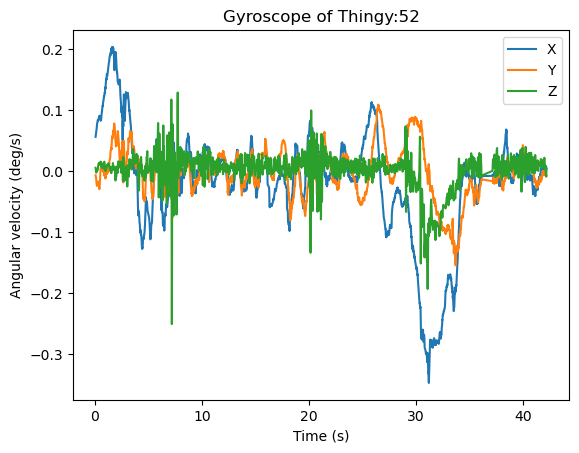

In [10]:
#Convert to deg/s
conv_fac = (180/math.pi)/10000 #rad/s --> deg/s, conversion factor of 180/π ≈ 57.2958 and then a scaling factor of 10000?
#by hand calculation gave: *0.0052, from angle graph
print(conv_fac)
df['xg'] = df['xg']*conv_fac
df['yg'] = df['yg']*conv_fac
df['zg'] = df['zg']*conv_fac

# Don't remove DC offset from this, since it messes with angle
gyr_x = df['xg']
gyr_y = df['yg']
gyr_z = df['zg']
mGyr_x = df['mGyr_0']
mGyr_y = df['mGyr_1']
mGyr_z = df['mGyr_2']

plt.plot(time, gyr_x, label='X')
plt.plot(time, gyr_y, label='Y')
plt.plot(time, gyr_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.title('Gyroscope of Thingy:52')
plt.legend()
plt.show()

plt.plot(time, mGyr_x, label='X')
plt.plot(time, mGyr_y, label='Y')
plt.plot(time, mGyr_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity ()')
plt.title('Gyroscope of Phone')
plt.legend()
plt.show()

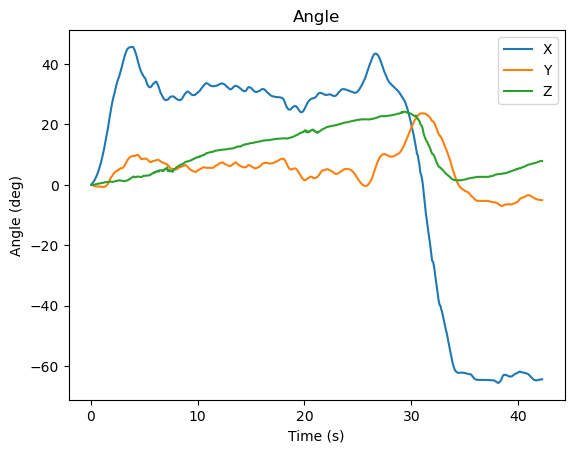

NEED TO VERIFY UNITS!!


In [11]:
# Compute the cumulative sum of the gyroscope data for each dimension to get the angle
angle_x = np.cumsum(gyr_x) # Direction of bike
angle_y = np.cumsum(gyr_y) # Tilt of bike, balance
angle_z = np.cumsum(gyr_z) # Driving up and downhill
#TODO: ADD SMARTPHONE GYROSCOPE HERE (once possible), might be more clear ngl

#offset = 90/(angle_y.iloc[1500] - angle_y.iloc[100])
#print(offset)

# Plot the angle for each dimension
plt.plot(time, angle_x, label='X')
plt.plot(time, angle_y, label='Y')
plt.plot(time, angle_z, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.title('Angle')
plt.legend()
plt.show()

print('NEED TO VERIFY UNITS!!')
#TODO: Figure out units -> documentation
#TODO: fix units to get 90 deg turn
#TODO: watch veritasium video about bicycles

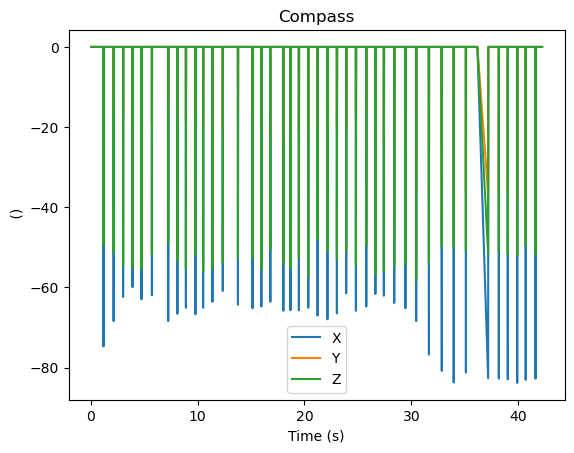

In [12]:
com_x = df['xc']
com_y = df['yc']
com_z = df['zc']

plt.plot(time, com_x, label='X')
plt.plot(time, com_y, label='Y')
plt.plot(time, com_z, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel(' ()')
plt.title('Compass')
plt.legend()
plt.show()

#TODO: This doesn't make a whole lot of sense to me, should be similar to angle right?